In [3]:
!pip install scikit-image

     ---------------------------------------- 12.1/12.1 MB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.9/1.9 MB 1.2 MB/s eta 0:00:00
  Using cached scipy-1.7.3-cp37-cp37m-win_amd64.whl (34.1 MB)
     ---------------------------------------- 3.4/3.4 MB 1.1 MB/s eta 0:00:00
     ------------------------------------ 178.9/178.9 kB 901.9 kB/s eta 0:00:00
  Using cached scikit_image-0.19.3-cp37-cp37m-win_amd64.whl (12.1 MB)
  Using cached imageio-2.22.2-py3-none-any.whl (3.4 MB)


In [3]:
# Import Your Libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

import copy

## Part 1

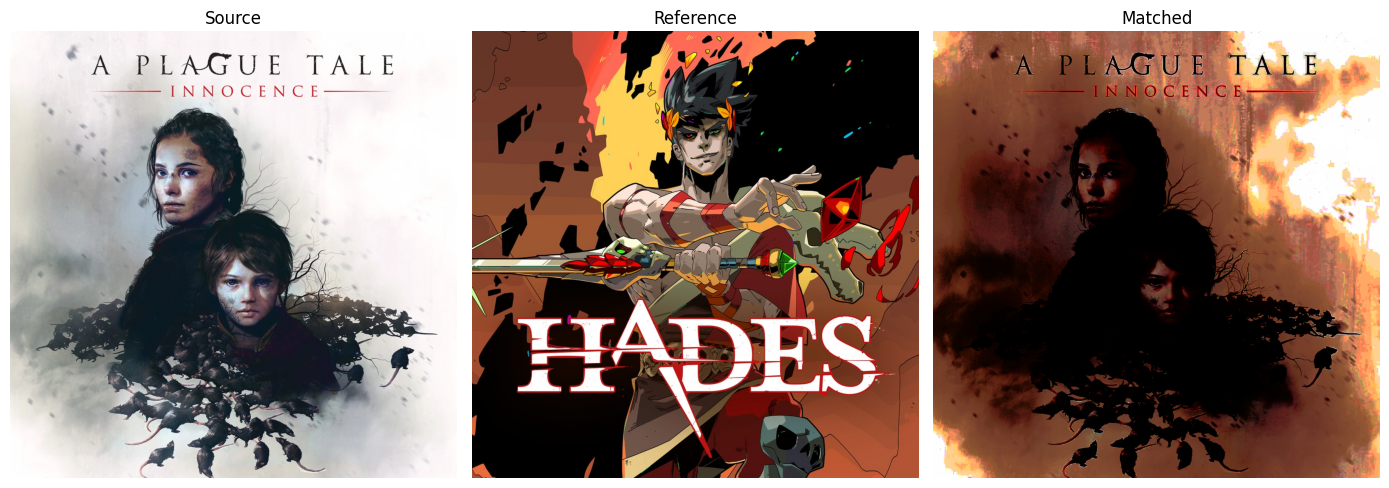

In [13]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = match_histograms(source, reference, channel_axis=-1)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 2

In [39]:
def hist_matching(src_image, ref_image):
    '''
    inputs:
    src_image (ndarray): source image
    ref_image (ndarray): reference image
    output:
    output_image (ndarray): transformed image 
    '''

    ### YOUR CODE ###
    # START
    L = 256
    output_image = copy.deepcopy(src_image)
    
    for channel_ind in range(3):
        cnt1 = np.zeros((L, ), dtype=int)
        cnt2 = np.zeros((L, ), dtype=int)
        for row in src_image:
            for pixel in row:
                cnt1[pixel[channel_ind]] += 1
        for row in ref_image:
            for pixel in row:
                cnt2[pixel[channel_ind]] += 1 
        
        cdf1 = np.zeros((L, ), dtype=np.float64)
        cdf2 = np.zeros((L, ), dtype=np.float64)
        cdf1[0] = cnt1[0]
        cdf2[0] = cnt2[0]
        for i in range(1, L):
            cdf1[i] = cdf1[i - 1] + cnt1[i]
            cdf2[i] = cdf2[i - 1] + cnt2[i]
        
        # Normalize cdf values
        for i in range(L):
            cdf1[i] /= src_image.shape[0] * src_image.shape[1]
            cdf2[i] /= ref_image.shape[0] * ref_image.shape[1]
        
        final_map = np.zeros((L, ), dtype=int)
        j = 0
        for i in range(L):
            while cdf1[i] > cdf2[j]:
                j += 1
            final_map[i] = j
            
        for i in range(src_image.shape[0]):
            for j in range(src_image.shape[1]):
                output_image[i][j] = final_map[src_image[i][j]]
        
    # END

    return output_image

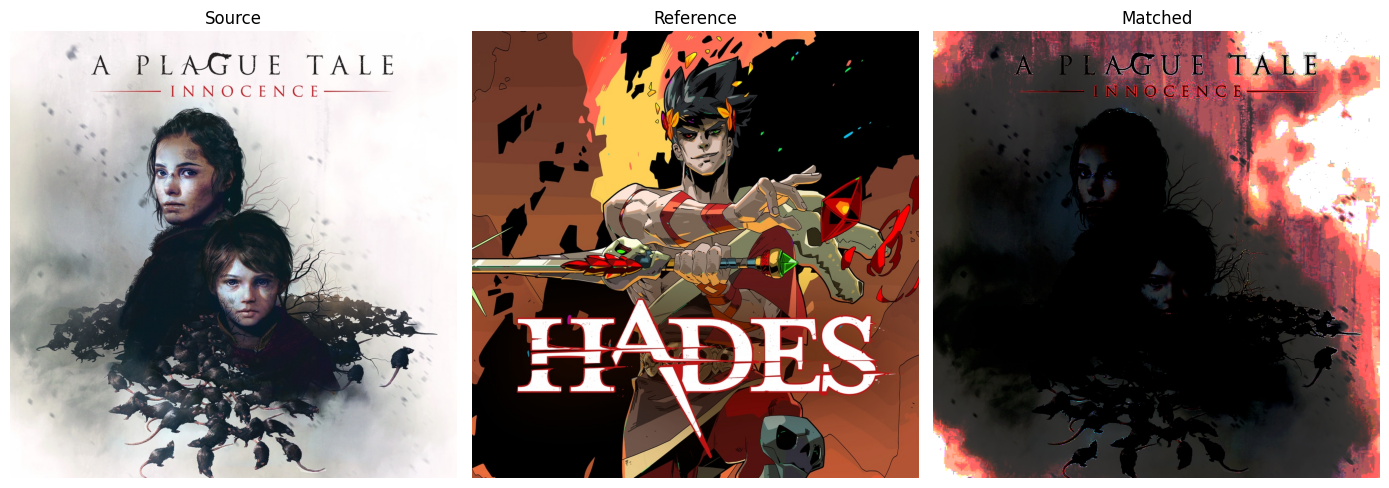

In [41]:
source = plt.imread('A Plague Tale.jpg')
reference = plt.imread('Hades.jpg')

### YOUR CODE ###
# START
matched = hist_matching(source, reference)
# END

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

## Part 3

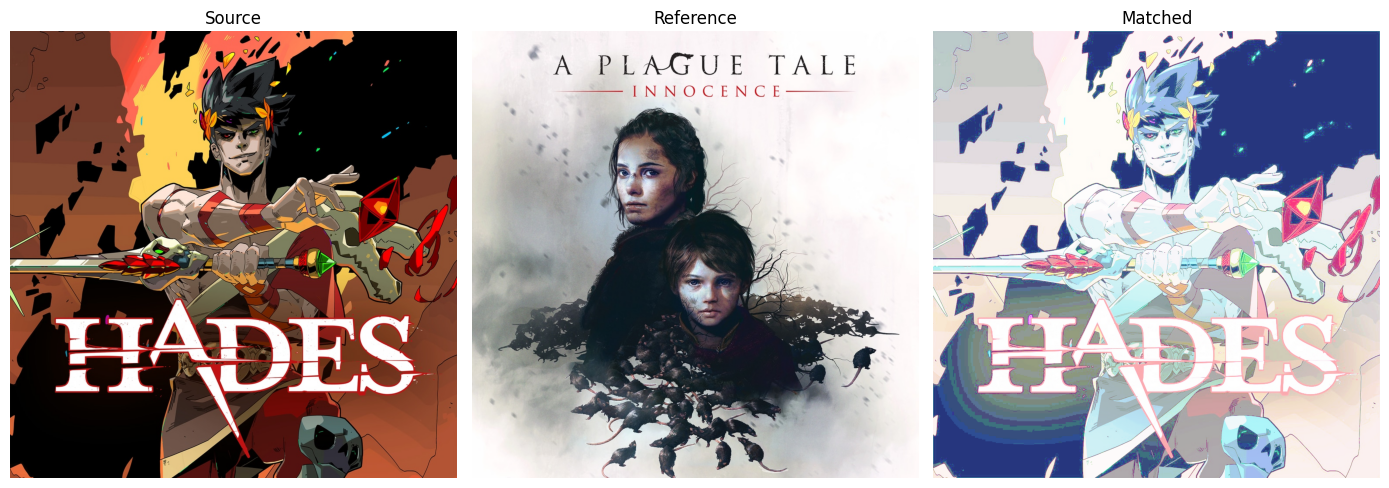

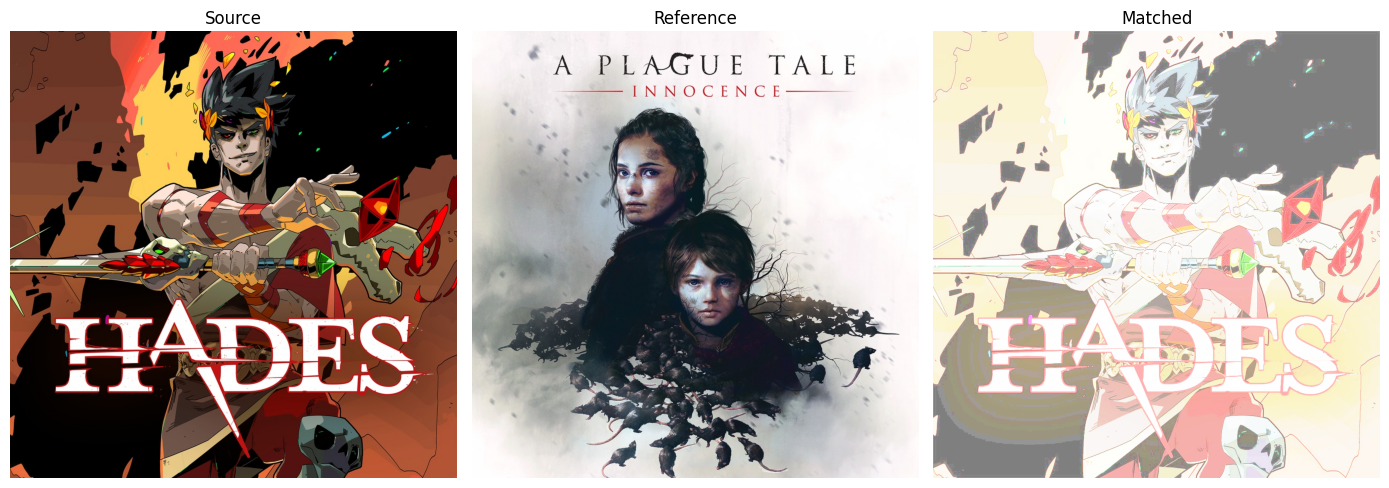

In [43]:
source = plt.imread('Hades.jpg')
reference = plt.imread('A Plague Tale.jpg')

# Not my function
matched = match_histograms(source, reference, channel_axis=-1)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
plt.tight_layout()
plt.show()

# My function
matched = hist_matching(source, reference)
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(14, 14),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()
ax1.imshow(source)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')
plt.tight_layout()
plt.show()